# **Case Study: UK Used BMW Cars**
Soal : Dataset yang digunakan merupakan listing mobil BMW bekas yang diperjualbelikan di Britania Raya.
Terdapat sekitar 10.000 mobil BMW bekas di dalam listing tersebut. kalian dapat mempelajari dataset ini
dengan lebih lanjut di halaman ini.

1. Membagi mobil-mobil BMW bekas di dalam listing ke dalam beberapa kelompok berdasarkan
faktor-faktor tertentu
Peminat mobil BMW bekas tentunya memiliki segmentasinya sendiri. Berhubung kalian baru memiliki
data terkait mobil bekasnya, bukan pembeli atau calon pembelinya, kalian diminta untuk mulai
mengenali calon pembeli mobil BMW bekas berdasarkan karakteristik mobil BMW seperti apa saja yang
kemungkinan akan dibeli oleh mereka, lalu membagi mobil-mobil dengan karakteristik serupa ke
sebuah kelompok, sehingga terbentuk beberapa kelompok mobil yang sedemikian sehingga terdapat
kesamaan di antara mobil-mobil di dalam kelompok yang sama.

2. Melakukan prediksi terhadap harga mobil BMW bekas berdasarkan kriteria dan kondisi mobil
Di dalam listing yang kalian miliki, kalian dapat memperoleh berbagai informasi terkait masing-masing
mobil bekas, seperti model mobil, tahun registrasi mobil, jenis transmisi, dan sebagainya. Namun,
belum tentu setiap informasi tersebut dipertimbangkan oleh para calon penjual dalam menentukan
harga mobil BMW bekas mereka, khususnya di pasaran Britania Raya. Dengan mencoba membangun sebuah model prediksi, diharapkan kalian dapat memberikan gambaran
mengenai faktor apa saja yang dilihat oleh para pemilik mobil BMW bekas dalam menentukan harga
mobil mereka. Namun apabila interpretasi model kalian sulit dijelaskan, kalian setidaknya
diharapkan dapat menjadikan model tersebut sebagai purwarupa (prototype) untuk membantu
menentukan harga suatu BMW bekas.

# **Modules**

In [194]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn import tree
import graphviz

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [3]:
from google.colab import files
files.upload()

Saving bmw.csv to bmw.csv


{'bmw.csv': b'model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize\r\n 5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0\r\n 6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0\r\n 5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0\r\n 1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5\r\n 7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0\r\n 5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0\r\n 5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0\r\n 2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5\r\n 4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0\r\n 5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0\r\n X3,2017,15500,Manual,74907,Diesel,145,52.3,2.0\r\n 1 Series,2017,11800,Manual,29840,Diesel,20,68.9,2.0\r\n X3,2016,15500,Automatic,77823,Diesel,125,54.3,2.0\r\n 2 Series,2015,10500,Manual,31469,Diesel,20,68.9,2.0\r\n X3,2017,22000,Automatic,19057,Diesel,145,54.3,2.0\r\n 3 Series,2017,16500,Manual,16570,Diesel,125,58.9,2.0\

In [124]:
df = pd.read_csv('bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [17]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [45]:
df.nunique()

model             24
year              25
price           3777
transmission       3
mileage         8086
fuelType           5
tax               38
mpg              102
engineSize        17
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [44]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [46]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

# **Exploratory Data Analysis**

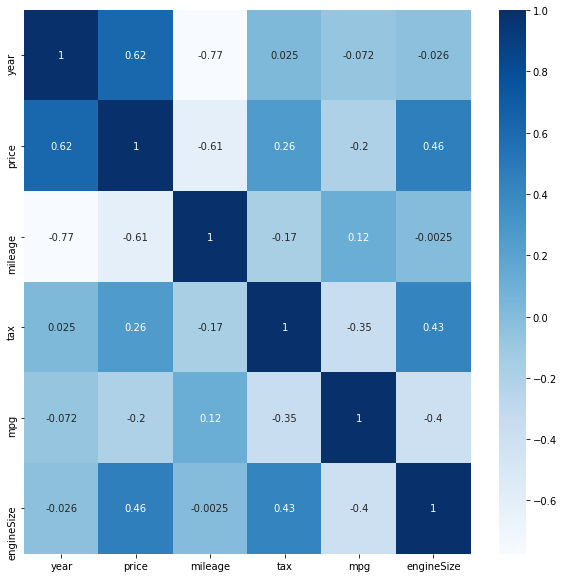

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

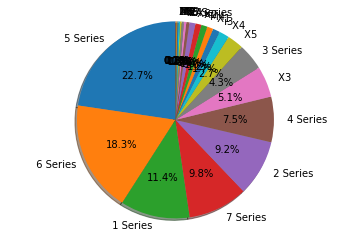

In [51]:
df_ser_=df['model'].value_counts()
df_ser=pd.DataFrame(df_ser_)
labels=df['model'].unique()
sizes=df_ser['model']

fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=None,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.show()

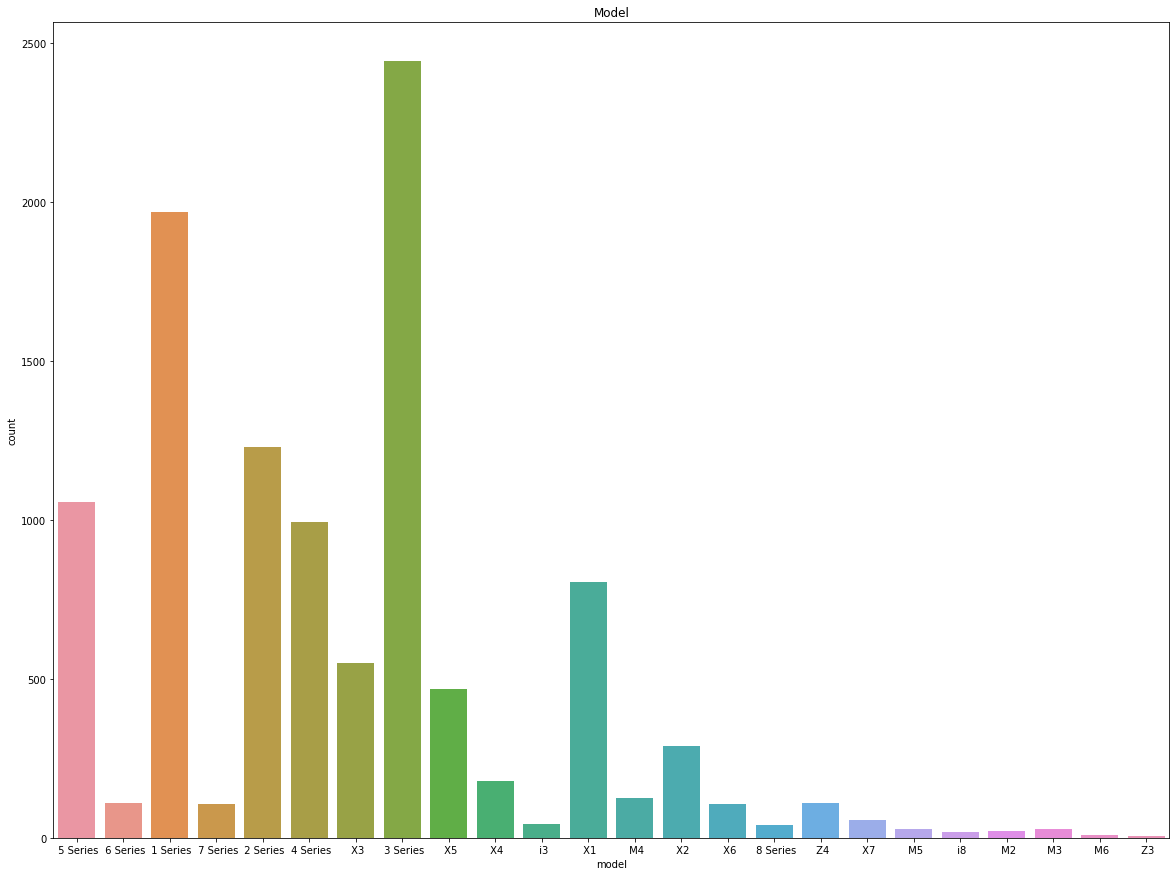

In [71]:
plt.figure(figsize=(20,15))
sns.countplot(df['model'])
plt.title('Model')
plt.show()

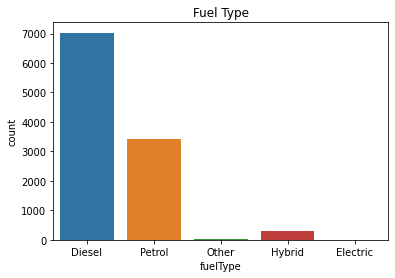

In [69]:
sns.countplot(df['fuelType'])
plt.title('Fuel Type')
plt.show()

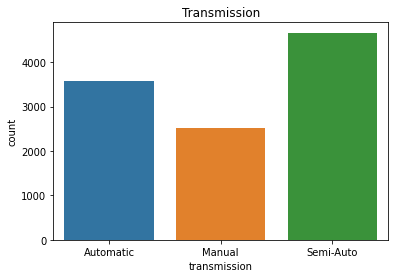

In [72]:
sns.countplot(df['transmission'])
plt.title('Transmission')
plt.show()

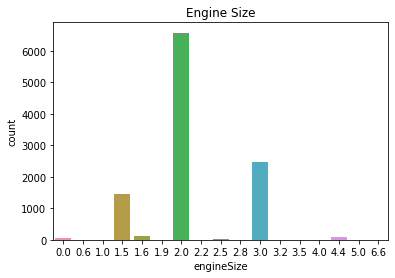

In [73]:
sns.countplot(df['engineSize'])
plt.title('Engine Size')
plt.show()

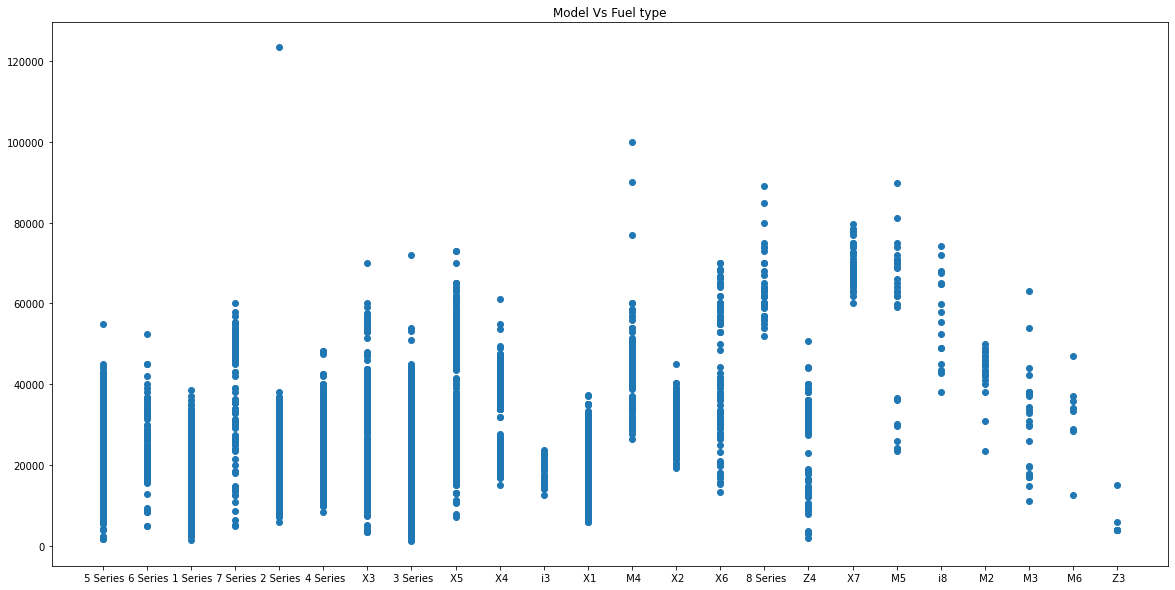

In [61]:
plt.figure(figsize=(20,10))
plt.scatter(df['model'],df['price'])
plt.title('Model Vs Fuel type')
plt.show()

<Figure size 3600x2160 with 0 Axes>

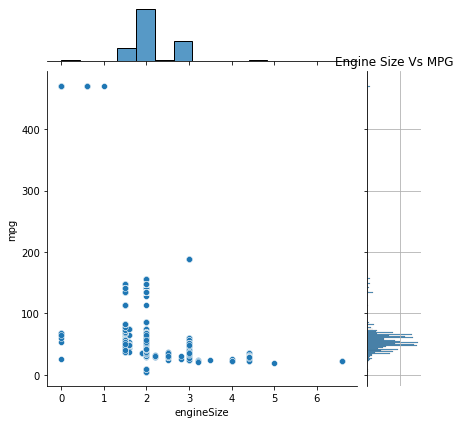

In [74]:
plt.figure(figsize=(50,30))
sns.jointplot(x='engineSize',y='mpg',data=df)
plt.xlabel('engineSize')
plt.ylabel('mpg')
plt.title('Engine Size Vs MPG')
plt.grid()
plt.show()

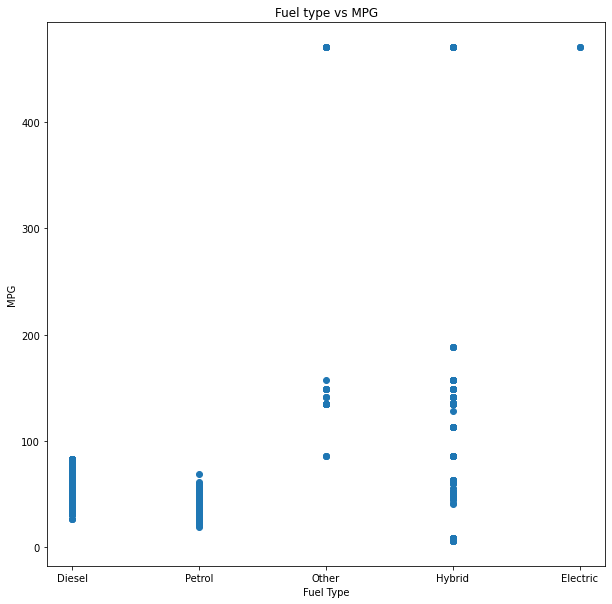

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(df['fuelType'],df['mpg'])
plt.xlabel('Fuel Type')
plt.ylabel('MPG')
plt.title('Fuel type vs MPG')
plt.show()

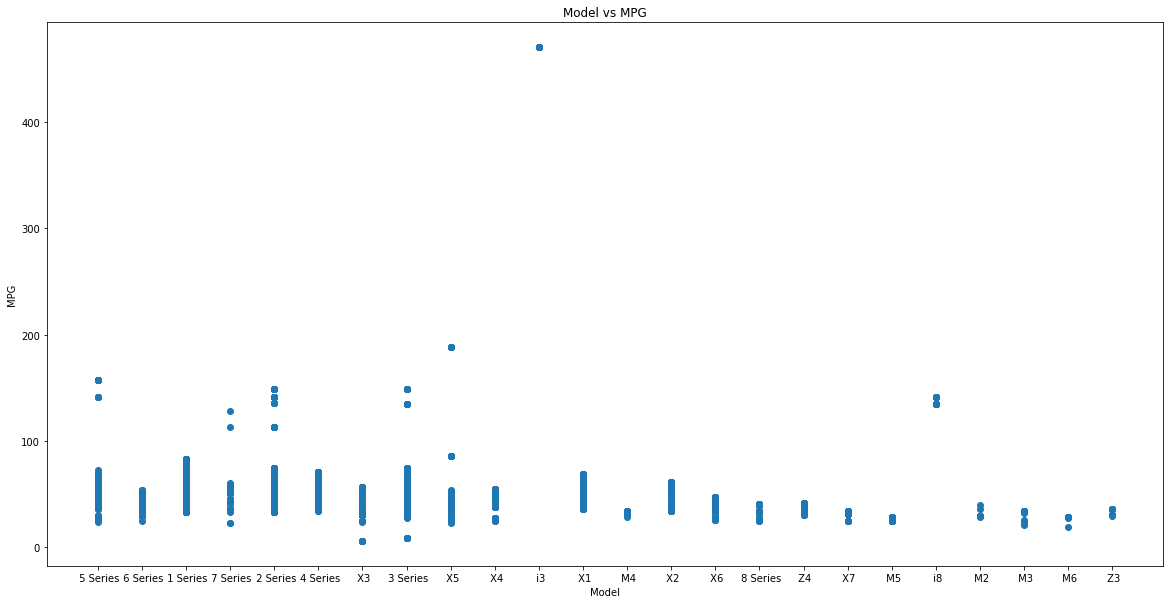

In [76]:
plt.figure(figsize=(20,10))
plt.scatter(df['model'],df['mpg'])
plt.xlabel('Model')
plt.ylabel('MPG')
plt.title('Model vs MPG')
plt.show()

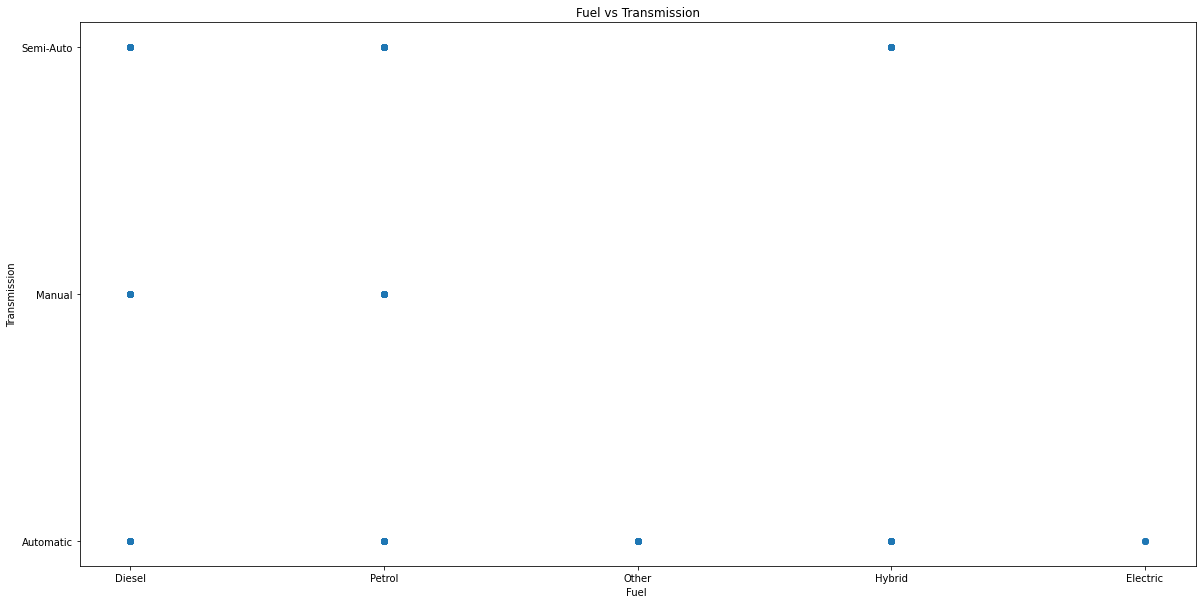

In [79]:
plt.figure(figsize=(20,10))
plt.scatter(df['fuelType'],df['transmission'])
plt.xlabel('Fuel ')
plt.ylabel('Transmission')
plt.title('Fuel vs Transmission')
plt.show()

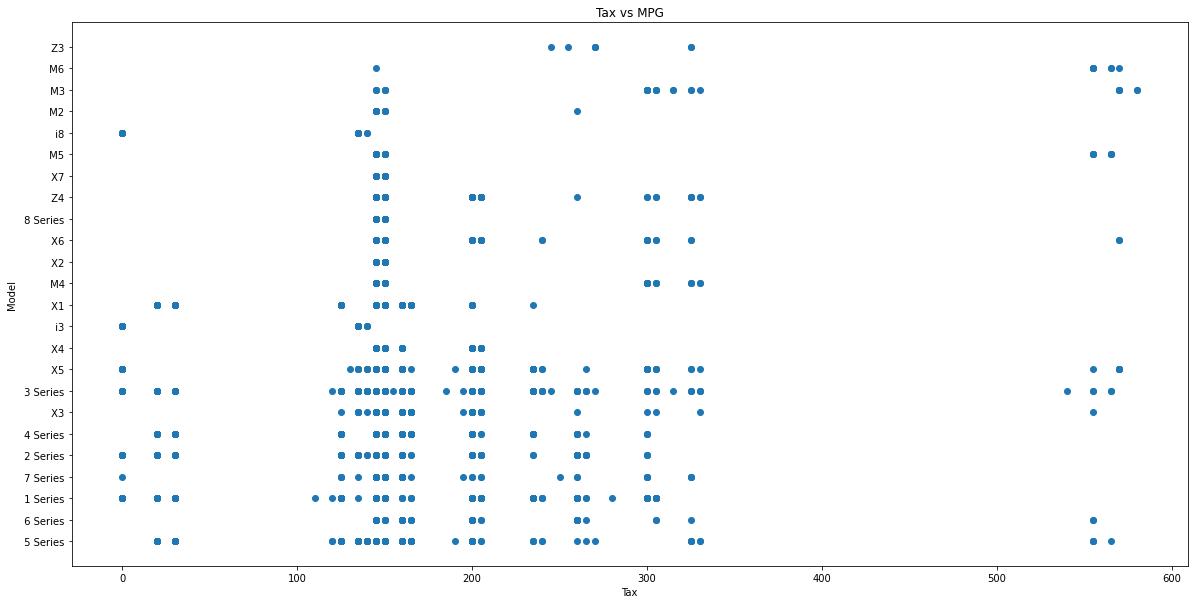

In [78]:
plt.figure(figsize=(20,10))
plt.scatter(df['tax'],df['model'])
plt.xlabel('Tax')
plt.ylabel('Model')
plt.title('Tax vs MPG')
plt.show()

# **Clustering**

## **Merubah kolom kategori menjadi numerik dengan LabelEncoder()**

In [158]:
df1 = df.copy()
df1.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,4,2014,11200,0,67068,0,125,57.6,2.0
1,5,2018,27000,0,14827,4,145,42.8,2.0
2,4,2016,16000,0,62794,0,160,51.4,3.0
3,0,2017,12750,0,26676,0,145,72.4,1.5
4,6,2014,14500,0,39554,0,160,50.4,3.0


In [159]:
label_encoder = LabelEncoder()

df1['model'] = label_encoder.fit_transform(df1['model'])
df1['transmission'] = label_encoder.fit_transform(df1['transmission'])
df1['fuelType'] = label_encoder.fit_transform(df1['fuelType'])

## **Define X dan Scaling**

In [191]:
X = df1.values
X

array([[4.0000e+00, 2.0140e+03, 1.1200e+04, ..., 1.2500e+02, 5.7600e+01,
        2.0000e+00],
       [5.0000e+00, 2.0180e+03, 2.7000e+04, ..., 1.4500e+02, 4.2800e+01,
        2.0000e+00],
       [4.0000e+00, 2.0160e+03, 1.6000e+04, ..., 1.6000e+02, 5.1400e+01,
        3.0000e+00],
       ...,
       [2.0000e+00, 2.0170e+03, 1.3100e+04, ..., 2.0000e+02, 4.2800e+01,
        2.0000e+00],
       [0.0000e+00, 2.0140e+03, 9.9300e+03, ..., 3.0000e+01, 6.4200e+01,
        2.0000e+00],
       [1.3000e+01, 2.0170e+03, 1.5981e+04, ..., 1.2500e+02, 5.7600e+01,
        2.0000e+00]])

In [192]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.21436266, -1.31078245, -1.0103732 , ..., -0.10896272,
         0.038326  , -0.30391088],
       [-0.04919372,  0.39212116,  0.37377062, ...,  0.21619875,
        -0.43398169, -0.30391088],
       [-0.21436266, -0.45933065, -0.58987382, ...,  0.46006985,
        -0.15953263,  1.50759086],
       ...,
       [-0.54470056, -0.03360474, -0.84392553, ...,  1.11039279,
        -0.43398169, -0.30391088],
       [-0.87503845, -1.31078245, -1.12163033, ..., -1.65347971,
         0.24894971, -0.30391088],
       [ 1.27215785, -0.03360474, -0.59153829, ..., -0.10896272,
         0.038326  , -0.30391088]])

## **PCA dan DBSCAN**

In [200]:
pca = PCA(n_components=2, whiten=True)

X_scaled_pca = pca.fit_transform(X_scaled)
X_scaled_pca.shape

(10781, 2)

In [206]:
dbscan = DBSCAN(eps=0.8, min_samples=6)

cluster = dbscan.fit_predict(X_scaled_pca)

print('Cluster : ',cluster)
print('Silhouette Score : ',silhouette_score(X_scaled_pca, cluster)*100)

Cluster :  [0 0 0 ... 0 0 0]
Silhouette Score :  64.32313247897125


In [207]:
df1['cluster'] = cluster
df1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,cluster
0,4,2014,11200,0,67068,0,125,57.6,2.0,0
1,5,2018,27000,0,14827,4,145,42.8,2.0,0
2,4,2016,16000,0,62794,0,160,51.4,3.0,0
3,0,2017,12750,0,26676,0,145,72.4,1.5,0
4,6,2014,14500,0,39554,0,160,50.4,3.0,0
...,...,...,...,...,...,...,...,...,...,...
10776,15,2016,19000,0,40818,0,150,54.3,2.0,0
10777,4,2016,14600,0,42947,0,125,60.1,2.0,0
10778,2,2017,13100,1,25468,4,200,42.8,2.0,0
10779,0,2014,9930,0,45000,0,30,64.2,2.0,0


In [208]:
df1['cluster'].value_counts()

 0    10704
 1       43
 2       33
-1        1
Name: cluster, dtype: int64

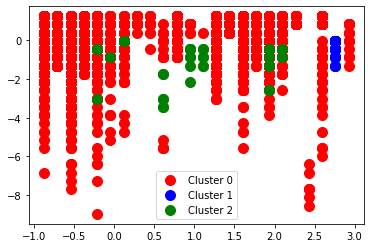

In [209]:
plt.scatter(X_scaled[cluster==0, 0], X_scaled[cluster==0, 1], s=100, c='red', label ='Cluster 0')
plt.scatter(X_scaled[cluster==1, 0], X_scaled[cluster==1, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(X_scaled[cluster==2, 0], X_scaled[cluster==2, 1], s=100, c='green', label ='Cluster 2')
plt.legend()
plt.show()

# **Regression**

## **Merubah kolom kategori menjadi numerik dengan LabelEncoder()**

In [128]:
df2 = df.copy()
df2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [129]:
label_encoder = LabelEncoder()

df2['model'] = label_encoder.fit_transform(df2['model'])
df2['transmission'] = label_encoder.fit_transform(df2['transmission'])
df2['fuelType'] = label_encoder.fit_transform(df2['fuelType'])

In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  int64  
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  int64  
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  int64  
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 758.2 KB


## **Splitting Data dan menggunakan LinearRegression()**

In [131]:
X = df2.drop('price', axis=1)
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8624, 8), (2157, 8), (8624,), (2157,))

In [132]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

## **Performance metrics**

In [133]:
print('R-Squared : ',r2_score(y_test, y_pred)*100)

R-Squared :  74.10497104190172


In [111]:
ridge = Ridge(alpha=2, max_iter=1000)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print('Ridge : ',ridge.score(X_test, y_test)*100) 

Ridge:  74.10489508001166


## **Gradient Boosting Regression**

In [134]:
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print('Gradient Booster : ',gb.score(X_test, y_test)*100) 

Gradient Booster :  92.40302585282458


In [135]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred_xgb = gb.predict(X_test)

print('XGradient Booster : ',xgb.score(X_test, y_test)*100)

[05:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGradient Booster :  92.31166421431479


## **Perbandingan nilai y (price)**

In [136]:
vals_gb = pd.DataFrame({
    'Predicted' : y_pred,
    'Predicted Ridge' : y_pred_ridge,
    'Predicted GB' : y_pred_gb,
    'Predicted XGB' : y_pred_xgb,
    'Actual' : y_test
})
vals_gb

,Predicted,Predicted Ridge,Predicted GB,Predicted XGB,Actual
8728,13489.990153,13497.079822,15020.006884,15020.006884,15300
761,11141.348691,11144.902474,13033.343575,13033.343575,15495
7209,41212.705374,41207.913434,44038.537815,44038.537815,39875
6685,20680.398385,20685.975371,22198.847205,22198.847205,21730
8548,16968.987581,16975.276498,15963.309509,15963.309509,13799
...,...,...,...,...,...
10677,12996.859917,12998.503985,12699.355361,12699.355361,12000
8418,8791.475745,8794.055561,9922.173370,9922.173370,11759
1702,23853.025467,23854.583780,22592.584204,22592.584204,21460
6965,35665.851284,35670.857242,45794.209918,45794.209918,52991


## **Accuracy score**

In [137]:
print('Linear Regression accuracy score : ',r2_score(y_test, y_pred)*100)
print('Ridge Regression accuracy score : ',ridge.score(X_test, y_test)*100)
print('Gradient_Boosting Regression accuracy score : ',gb.score(X_test, y_test)*100)
print('XGB Regression accuracy score : ',xgb.score(X_test, y_test)*100) 

Linear Regression accuracy score :  74.10497104190172
Ridge Regression accuracy score :  74.10489508001166
Gradient_Boosting Regression accuracy score :  92.40302585282458
XGB Regression accuracy score :  92.31166421431479
